### Install Dependencies and Bring in Data

In [1]:
!pip install tensorflow pandas matplotlib scikit-learn

In [2]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

In [4]:
# Load your CSVs
train_df = pd.read_csv(r"C:\Users\DELL\Documents\CommentToxicity\toxic-comment-classificationdata\train.csv")
test_df = pd.read_csv(r"C:\Users\DELL\Documents\CommentToxicity\toxic-comment-classificationdata\test.csv")
test_labels = pd.read_csv(r"C:\Users\DELL\Documents\CommentToxicity\toxic-comment-classificationdata\test_labels.csv")


In [9]:
# Inputs and labels
X = train_df['comment_text']
y = train_df.iloc[:, 2:]  # toxic, severe_toxic, obscene, threat, insult, identity_hate



In [10]:
# Vectorize text
MAX_FEATURES = 200000
vectorizer = TextVectorization(max_tokens=MAX_FEATURES, output_sequence_length=1800, output_mode='int')
vectorizer.adapt(X.values)

In [11]:
X_vec = vectorizer(X.values)

In [16]:
# Create dataset
dataset = tf.data.Dataset.from_tensor_slices((X_vec, y.values))
dataset = dataset.shuffle(160000).batch(32).prefetch(tf.data.AUTOTUNE)


In [18]:
# Train/Validation split
train_size = int(0.8 * len(dataset))
train = dataset.take(train_size)
val = dataset.skip(train_size)

In [21]:
###CREATE SEQUENTIAL MODEL


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [22]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))


In [23]:

model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [28]:
history = model.fit(train, epochs=1, validation_data=val)


3989/3989 ━━━━━━━━━━━━━━━━━━━━ 3731s 935ms/step - loss: 0.0454 - val_loss: 0.0400


In [30]:
from matplotlib import pyplot as plt


<Figure size 800x500 with 0 Axes>

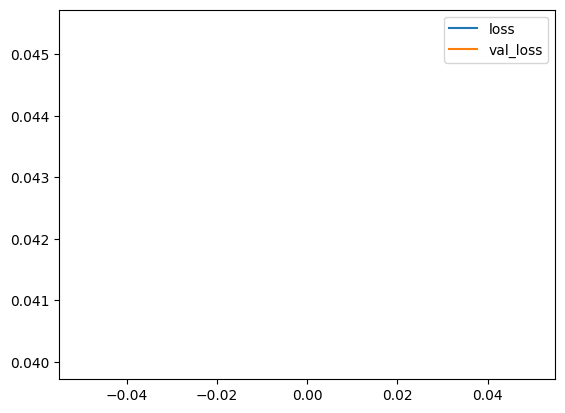

In [35]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [36]:
##MAKE PREDICTIONS

In [33]:
input_text = vectorizer('You freaking suck! I am going to hit you.')


In [37]:
res = model.predict(input_text)


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1/Cast:0", shape=(32,), dtype=float32). Expected shape (None, 1800), but input has incompatible shape (32,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(32,), dtype=int64)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [38]:
(res > 0.5).astype(int)


NameError: name 'res' is not defined

In [39]:
batch_X, batch_y = test.as_numpy_iterator().next()


NameError: name 'test' is not defined

In [40]:
(model.predict(batch_X) > 0.5).astype(int)

NameError: name 'batch_X' is not defined

In [41]:
res.shape


NameError: name 'res' is not defined

In [42]:
###EVALUATE MODEL

In [43]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy



In [44]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [45]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)


NameError: name 'test' is not defined

In [46]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.0, Recall:0.0, Accuracy:0.0


In [47]:
### Test and Gradio

In [48]:
!pip install gradio jinja2

   ---------------------------------------- 0.0/59.7 MB ? eta -:--:--
    --------------------------------------- 1.0/59.7 MB 6.3 MB/s eta 0:00:10
   - -------------------------------------- 1.6/59.7 MB 4.7 MB/s eta 0:00:13
   - -------------------------------------- 2.6/59.7 MB 4.1 MB/s eta 0:00:14
   -- ------------------------------------- 3.4/59.7 MB 4.0 MB/s eta 0:00:15
   -- ------------------------------------- 3.9/59.7 MB 3.8 MB/s eta 0:00:15
   --- ------------------------------------ 4.7/59.7 MB 3.7 MB/s eta 0:00:15
   --- ------------------------------------ 5.5/59.7 MB 3.7 MB/s eta 0:00:15
   ---- ----------------------------------- 6.3/59.7 MB 3.7 MB/s eta 0:00:15
   ---- ----------------------------------- 7.1/59.7 MB 3.7 MB/s eta 0:00:15
   ----- ---------------------------------- 7.9/59.7 MB 3.7 MB/s eta 0:00:14
   ----- ---------------------------------- 8.4/59.7 MB 3.6 MB/s eta 0:00:15
   ----- ---------------------------------- 8.9/59.7 MB 3.5 MB/s eta 0:00:15
   ---

In [49]:
import tensorflow as tf
import gradio as gr


In [ ]:
model.save('toxicity.h5')


In [ ]:
model = tf.keras.models.load_model('toxicity.h5')


In [ ]:
input_str = vectorizer('hey i freaken hate you!')

In [ ]:
res = model.predict(np.expand_dims(input_str,0))

In [ ]:
res


In [ ]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [ ]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [ ]:
interface.launch(share=True)